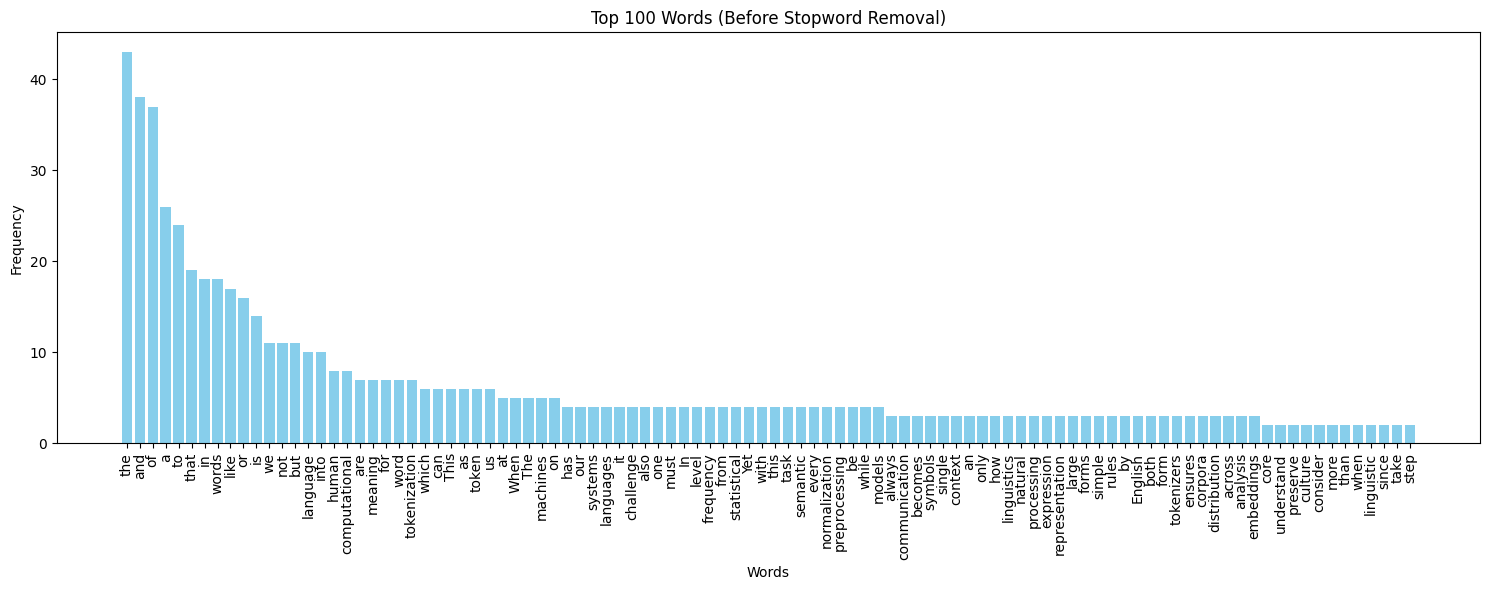

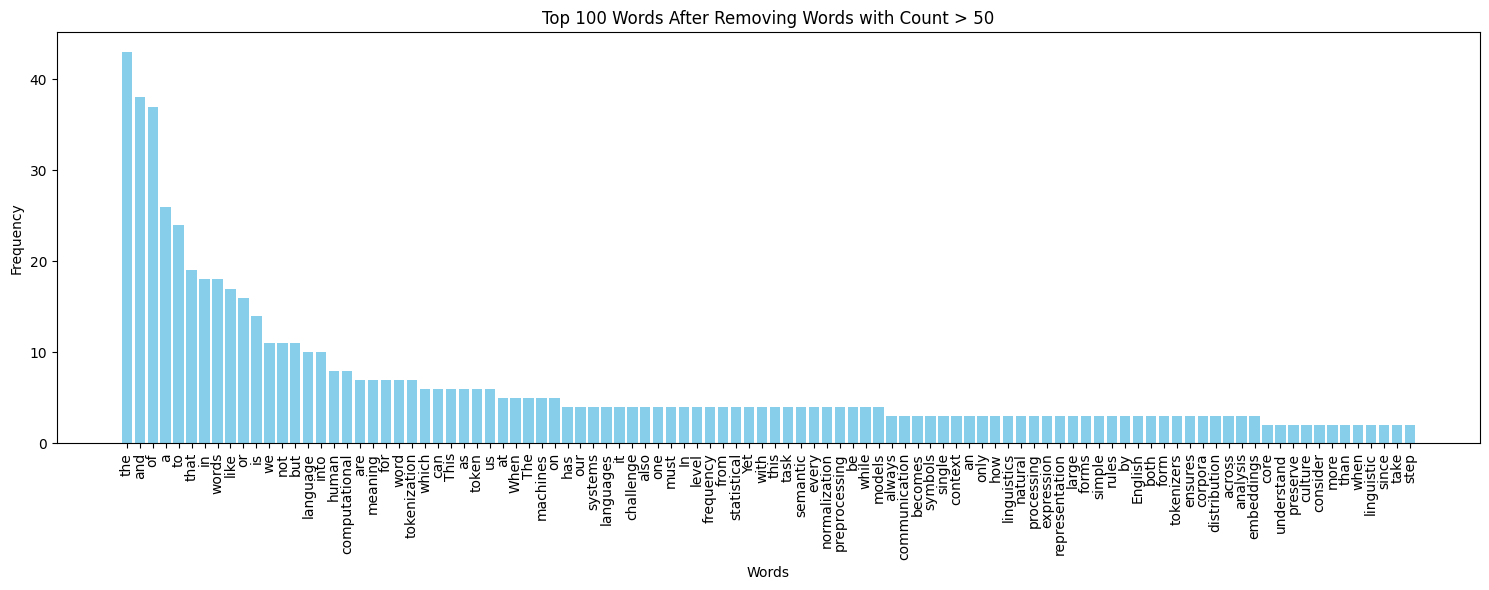

Threshold: 50, Stopwords Removed: 0
Most frequent word: the, Count: 43


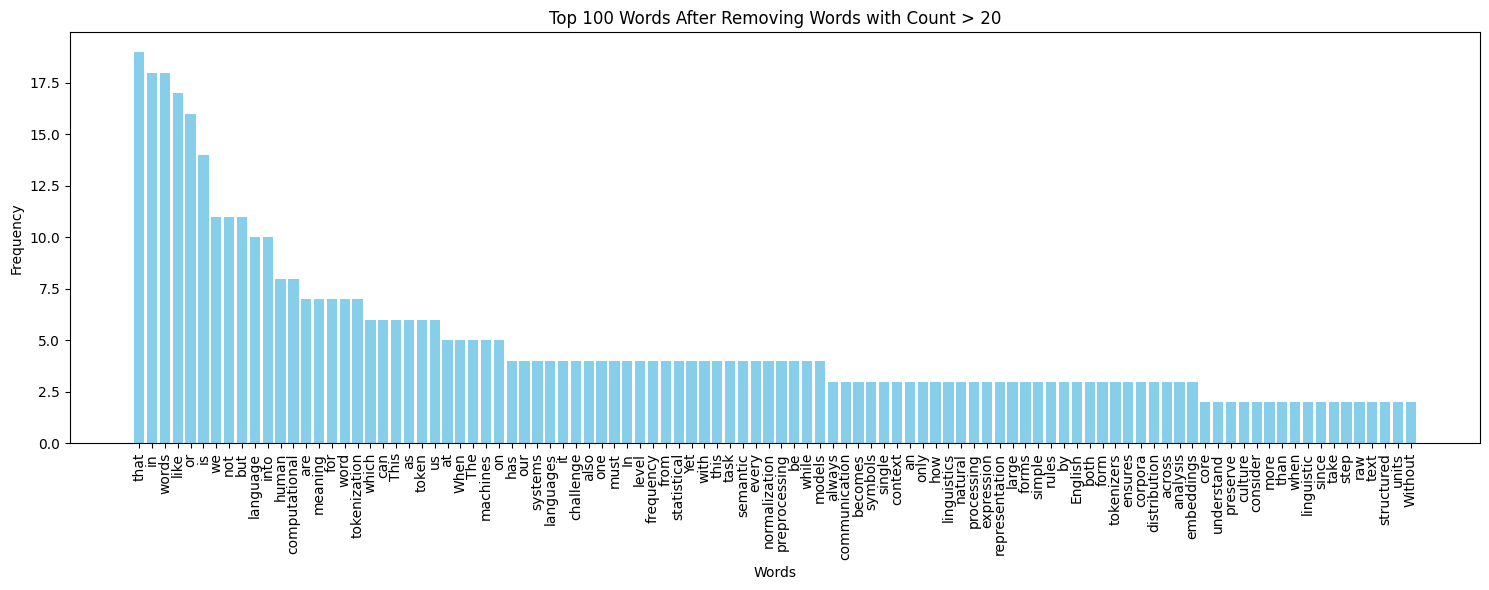

Threshold: 20, Stopwords Removed: 5
Most frequent word: that, Count: 19


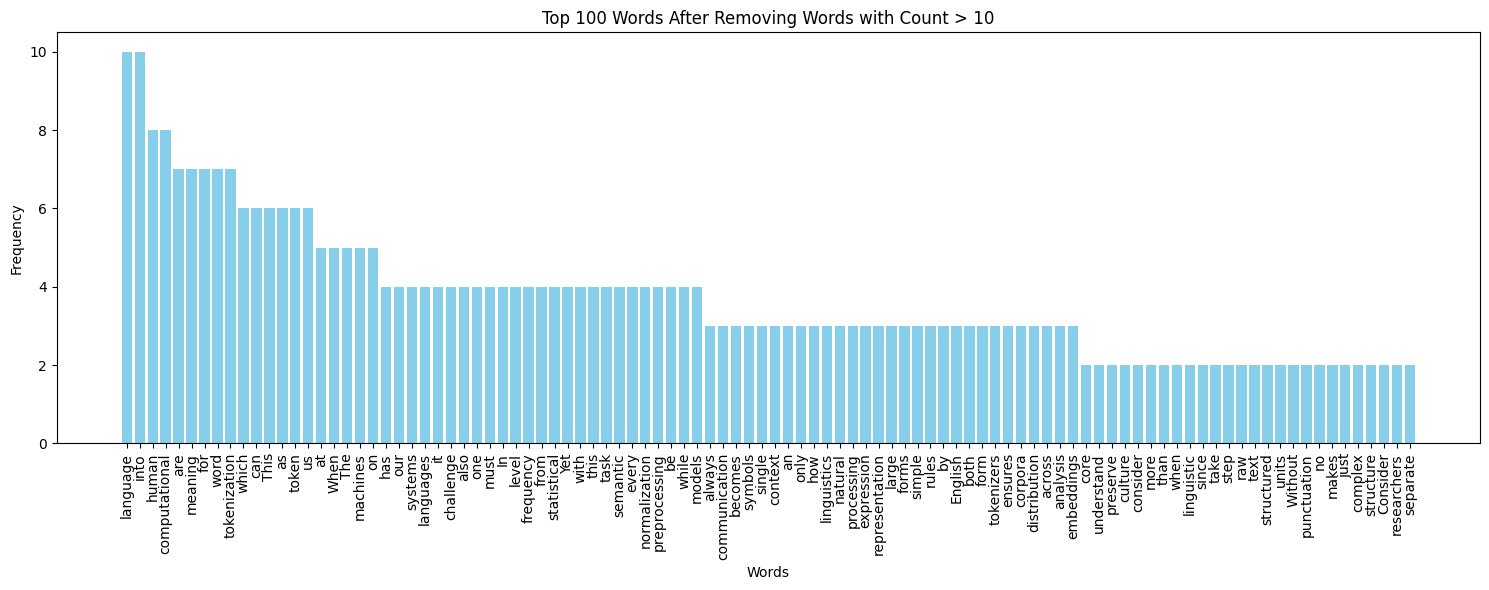

Threshold: 10, Stopwords Removed: 14
Most frequent word: language, Count: 10


: 

In [ ]:
import matplotlib.pyplot as plt

with open("tokenized.txt", "r", encoding="utf-8") as f:
    tokens = f.read().split()

def build_freq(tokens):
    freq = {}
    for tok in tokens:
        freq[tok] = freq.get(tok, 0) + 1
    return freq

def plot_top(freq_dict, top_n=100, title="Word Frequency Distribution"):
    sorted_items = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
    if not sorted_items:
        print(f"No words to plot for {title}")
        return
    words, counts = zip(*sorted_items)
    
    plt.figure(figsize=(15, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Frequency before removing stopwords
freq_dict = build_freq(tokens)
plot_top(freq_dict, 100, "Top 100 Words (Before Stopword Removal)")

def remove_stopwords(freq_dict, tokens, threshold):
    stopwords = {word for word, count in freq_dict.items() if count > threshold}
    filtered_tokens = [tok for tok in tokens if tok not in stopwords]
    return filtered_tokens, stopwords

thresholds = [50, 20, 10]

for t in thresholds:
    filtered_tokens, stopwords = remove_stopwords(freq_dict, tokens, t)
    
    filtered_freq = build_freq(filtered_tokens)
    
    # Plot top words **after stopword removal**
    plot_top(filtered_freq, 100, f"Top 100 Words After Removing Words with Count > {t}")
    
    print(f"Threshold: {t}, Stopwords Removed: {len(stopwords)}")
    # Find word with maximum frequency
    if filtered_freq:
        max_word = max(filtered_freq.items(), key=lambda x: x[1])
        print(f"Most frequent word: {max_word[0]}, Count: {max_word[1]}")
    else:
        print("No words left after filtering")



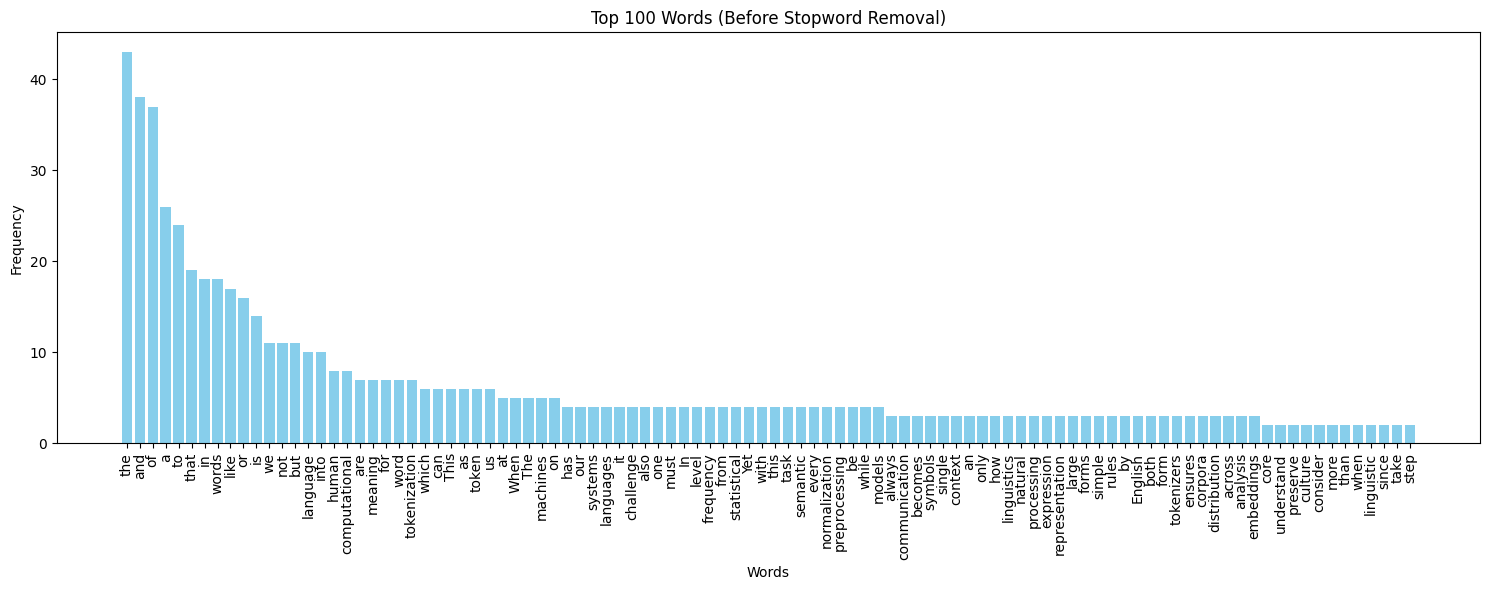

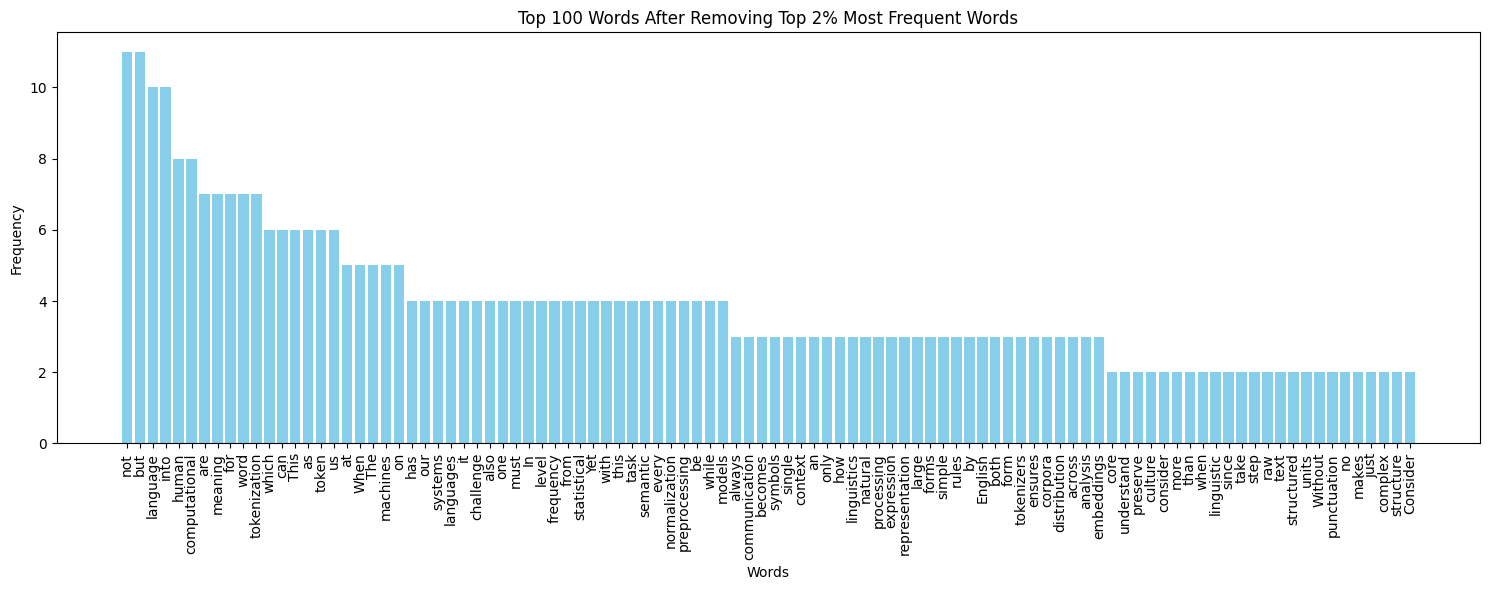

Removed top 2% words: 12
Examples of removed words: ['words', 'to', 'the', 'of', 'a', 'like', 'that', 'in', 'is', 'we', 'and', 'or']


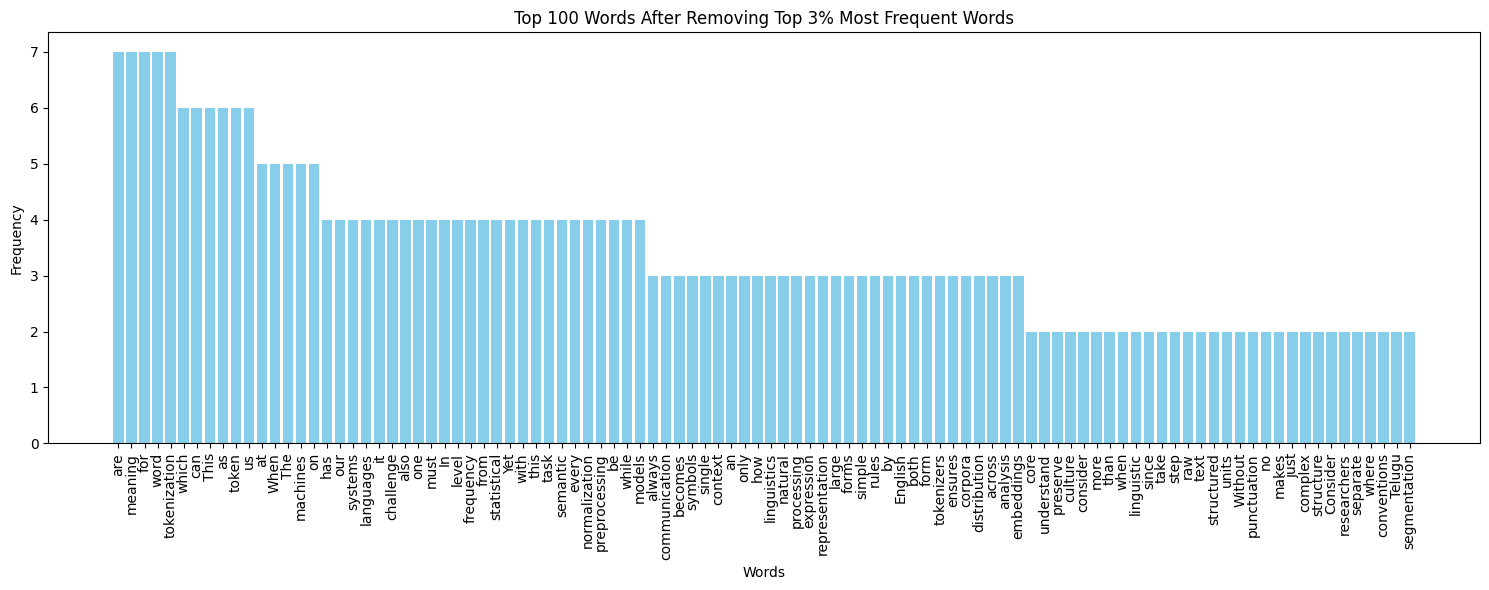

Removed top 3% words: 18
Examples of removed words: ['words', 'to', 'the', 'of', 'computational', 'human', 'a', 'like', 'that', 'in', 'is', 'we', 'not', 'but', 'language', 'into', 'and', 'or']


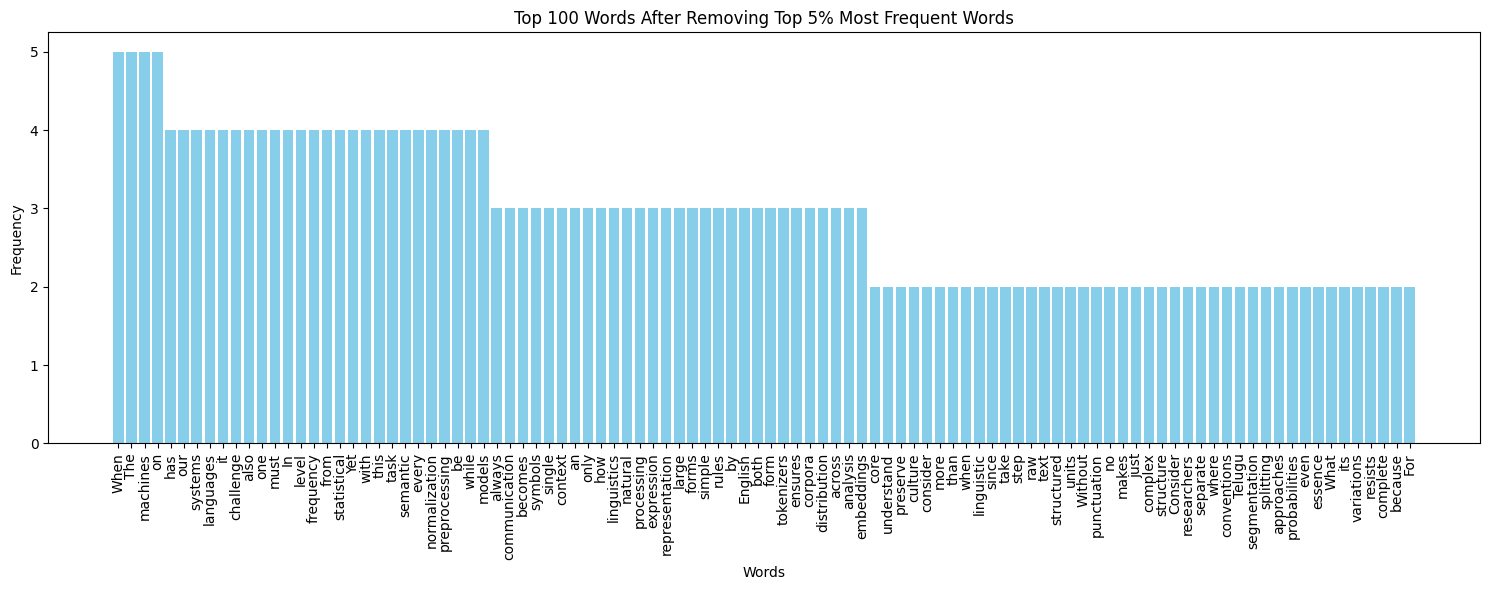

Removed top 5% words: 30
Examples of removed words: ['of', 'human', 'is', 'to', 'tokenization', 'at', 'can', 'like', 'This', 'we', 'not', 'token', 'and', 'word', 'are', 'meaning', 'the', 'a', 'us', 'that']


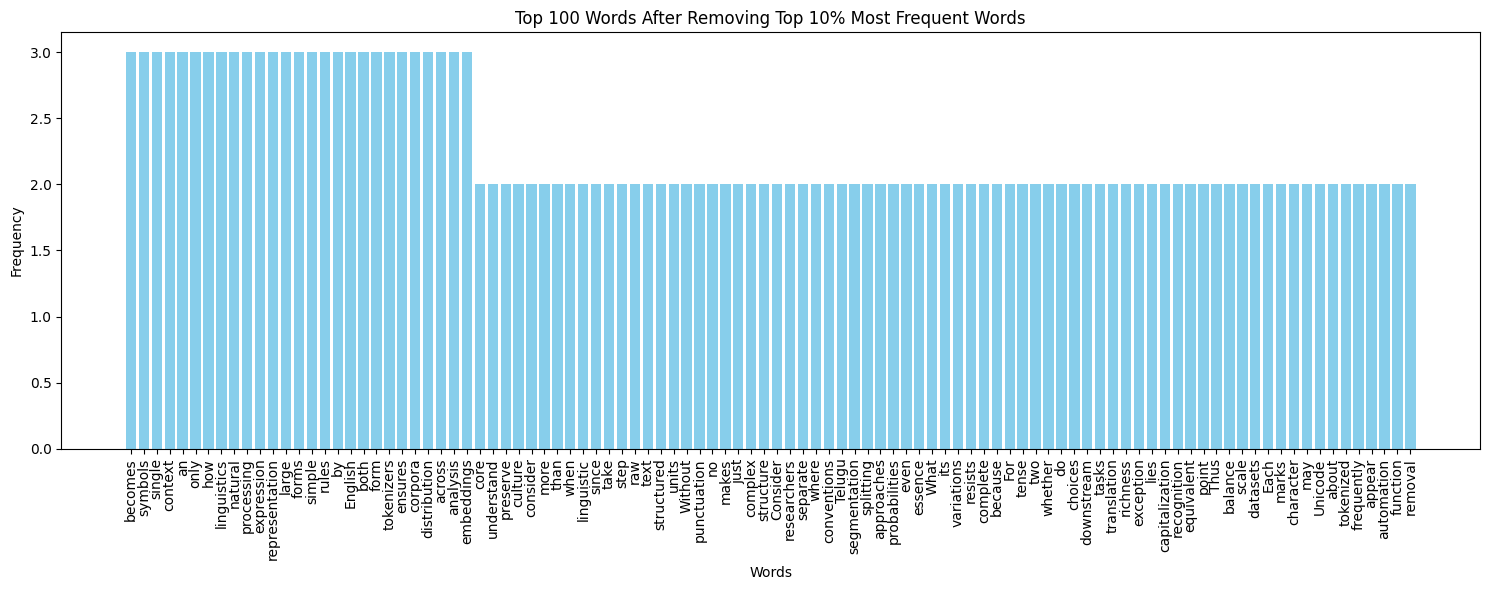

Removed top 10% words: 61
Examples of removed words: ['has', 'while', 'from', 'preprocessing', 'of', 'models', 'human', 'systems', 'is', 'Yet', 'one', 'When', 'machines', 'must', 'task', 'to', 'frequency', 'tokenization', 'at', 'can']


In [5]:
import matplotlib.pyplot as plt

with open("tokenized.txt", "r", encoding="utf-8") as f:
    tokens = f.read().split()

def build_freq(tokens):
    freq = {}
    for tok in tokens:
        freq[tok] = freq.get(tok, 0) + 1
    return freq

def plot_top(freq_dict, top_n=100, title="Word Frequency Distribution"):
    sorted_items = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
    if not sorted_items:
        print(f"No words to plot for {title}")
        return
    words, counts = zip(*sorted_items)
    
    plt.figure(figsize=(15, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

def remove_top_percent_words(freq_dict, tokens, percent=10):
    num_to_remove = max(1, int(len(freq_dict) * percent / 100))
    sorted_words = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    top_words = {word for word, count in sorted_words[:num_to_remove]}
    filtered_tokens = [tok for tok in tokens if tok not in top_words]
    return filtered_tokens, top_words

# Original frequency
freq_dict = build_freq(tokens)
plot_top(freq_dict, 100, "Top 100 Words (Before Stopword Removal)")

# Percentages to remove
percentages = [2, 3, 5, 10]

for pct in percentages:
    filtered_tokens, removed_words = remove_top_percent_words(freq_dict, tokens, percent=pct)
    filtered_freq = build_freq(filtered_tokens)
    plot_top(filtered_freq, 100, f"Top 100 Words After Removing Top {pct}% Most Frequent Words")
    print(f"Removed top {pct}% words: {len(removed_words)}")
    print(f"Examples of removed words: {list(removed_words)[:20]}")
